<a href="https://colab.research.google.com/github/BhavyaM2603/Netflix-EDA/blob/main/Netflix_India_EDA_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement:**
*Analyse three datasets of Netflix India Movies and TV Shows to understand few key characteristics like genre, ratings, content, production countries, releases over time, etc.*

*Using various data cleaning methods, as demonstrated in the codes below, we can optimise the dataset to derive accrurate readings and analysis.*

*Visual Graphs, as demonstrated in the output of codes, can be analysed and to derive conclusions thereby creating effective strategies, acquisitions, expansion etc.*

DATA CLEANING:
1) loading data
2)merging data
3)handling missing values
4)drop irrelevant columns
5)check for duplicates
6)standardize text data
7)convert incorrect dataype

# Data Cleaning


**1) Upload files. show file name and byte size**


In [2]:
from google.colab import files

uploaded = files.upload()

if uploaded:
  for fn in uploaded.keys():
    print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')
else:
  print("No files were uploaded.")

Saving netflix_india_shows_and_movies.csv to netflix_india_shows_and_movies.csv
Saving netflix_india_shows_episodes.csv to netflix_india_shows_episodes.csv
Saving netflix_india_shows_seasons.csv to netflix_india_shows_seasons.csv
User uploaded file "netflix_india_shows_and_movies.csv" with length 4206355 bytes
User uploaded file "netflix_india_shows_episodes.csv" with length 10427154 bytes
User uploaded file "netflix_india_shows_seasons.csv" with length 847209 bytes


**Import Libraries**

In [3]:

import pandas as pd           #used for data analysis. can access excel/csv/html files to read data
import seaborn as sns         # used for data visualization i.graphs charts etc
import matplotlib.pyplot as plt #seaborn builds graphs on matlplotlib



**create dataframe and upload each file into dataframe.**

In [4]:
import pandas as pd
import io

# Assuming the uploaded files are named as follows:
movies_shows_file = 'netflix_india_shows_and_movies.csv'
episodes_file = 'netflix_india_shows_episodes.csv'
seasons_file = 'netflix_india_shows_seasons.csv' # Corrected file name

# Create empty dataframes to store the data
df_movies_shows = None
df_episodes = None
df_seasons = None

# Load each file into a separate DataFrame if it was uploaded
if movies_shows_file in uploaded:
  df_movies_shows = pd.read_csv(io.BytesIO(uploaded[movies_shows_file]))
  print(f"'{movies_shows_file}' loaded successfully.")
  display(df_movies_shows.head())
else:
  print(f"File '{movies_shows_file}' was not uploaded.")

if episodes_file in uploaded:
  df_episodes = pd.read_csv(io.BytesIO(uploaded[episodes_file]))
  print(f"'{episodes_file}' loaded successfully.")
  display(df_episodes.head())
else:
  print(f"File '{episodes_file}' was not uploaded.")

if seasons_file in uploaded:
  df_seasons = pd.read_csv(io.BytesIO(uploaded[seasons_file]))
  print(f"'{seasons_file}' loaded successfully.")
  display(df_seasons.head())
else:
  print(f"File '{seasons_file}' was not uploaded.")

'netflix_india_shows_and_movies.csv' loaded successfully.


,showid,name,type,rating,duration,description,hook_text,genre,release_year,release_date,mood_tag,actors,creator,director,audio,subtitles,tags,similar_titles_id,production_country
0,81566729,Hot Wheels Let's Race,TVSeries,U/A 7+,1 Season,Six young hopefuls at the Hot Wheels Ultimate ...,NaN,Kids,2024.0,2024-3-4,Adrenaline Rush;Exciting,Griffin Campbell;Grey DeLisle;Eric Bauza;Jakar...,NaN,NaN,NaN,NaN,Kids' TV;TV Cartoons,81121910;80225085;81480111;81280732;80027979;8...,NaN
1,81739957,The Netflix Slam,Movie,U/A 7+,2.6833,It’s the legend vs. the prodigy as Rafael Nada...,"Play-by-play and commentary by Andre Agassi, A...",Sports,2024.0,2024-3-3,Feel-Good;Exciting,Rafael Nadal;Carlos Alcaraz;Andre Agassi;Andy ...,NaN,NaN,NaN,NaN,Sports & Fitness;Sports Events;US TV Shows,81569920;81026434;81025735;81128594;80204890;8...,United States
2,81407092,You Are Not Alone: Fighting the Wolf Pack,Movie,U/A 16+,1.7,"Through key testimonies, this documentary look...",NaN,Documentary,2023.0,2024-3-1,NaN,NaN,NaN,Almudena Carracedo;Robert Bahar,English;Spanish (Spain) - Audio Description;Sp...,English;English;Spanish (Spain),Spanish;Documentaries;Social & Cultural Docs,81150989;81168725;80215139;81637286;81667933;8...,Spain
3,81746263,"The Pig, the Snake and the Pigeon",Movie,A,2.2333,Upon discovering he's only Taiwan's third-most...,NaN,Drama,2023.0,2024-3-1,Emotional,Ethan Juan;Ben Yuen;Chen Yi-wen;Gingle Wang;Hs...,NaN,Wong Ching-po,Mandarin (Guoyu) [Original],English,Taiwanese;Crime Movies;Dramas;Action & Adventu...,81616524;81735590;81639031;81480217;81669979;8...,Taiwan
4,81301595,Spaceman,Movie,U/A 16+,1.8,"Six months into a solo mission, a lonely astro...",Adam Sandler stars with Oscar nominee Carey Mu...,Sci-Fi,2024.0,2024-3-1,Mind-Bending;Cerebral;Psychological,Adam Sandler;Carey Mulligan;Paul Dano;Kunal Na...,NaN,Johan Renck,English - Audio Description;English [Original]...,English,Sci-Fi Movies;Dramas;Movies Based on Books;Act...,81199139;81735590;81480217;81480320;80237957;8...,United States


'netflix_india_shows_episodes.csv' loaded successfully.


,showid,name,season,episode_title,runtime,synopsis
0,70153404,Friends,Season 1,1. The One Where Monica Gets a Roommate (Pilot),0.3833,Rachel runs from her wedding and meets the fri...
1,70153404,Friends,Season 1,2. The One with the Sonogram at the End,0.3833,Ross's lesbian ex-wife is pregnant with his ch...
2,70153404,Friends,Season 1,3. The One with the Thumb,0.3833,"A soda company gives Phoebe $7,000 after she f..."
3,70153404,Friends,Season 1,4. The One with George Stephanopoulos,0.3833,A deliveryman accidentally brings a pizza mean...
4,70153404,Friends,Season 1,5. The One with the East German Laundry Detergent,0.3833,Ross helps Rachel do laundry and considers the...


'netflix_india_shows_seasons.csv' loaded successfully.


,showid,name,season,release_year,episode_count,synopsis
0,70153404,Friends,Season 1,1994.0,24,Season 1 of the hit sitcom introduces us to ha...
1,70153404,Friends,Season 2,1995.0,24,"Rachel gets jealous of Ross's new girlfriend, ..."
2,70153404,Friends,Season 3,1996.0,25,The shenanigans of the tightest circle of frie...
3,70153404,Friends,Season 4,1997.0,24,Chandler makes amends to Joey by spending Than...
4,70153404,Friends,Season 5,1998.0,24,The friends continue to haphazardly navigate t...


**2) Merging the 3 DataFrames so i can analyse relationships between all three**

In [5]:
#merging movie_shows and episodes
merged_df=pd.merge(df_movies_shows, df_episodes, on=['showid','name'], how="left",suffixes=('_movies_shows','_episodes'))
#merging the merged with seasons
combined_df=pd.merge(merged_df,df_seasons,on=['showid','name','season'],how='left', suffixes=('_merged','_seasons'))
#print combined dataframe
print("Combined DataFrame complete")
display(combined_df)

Combined DataFrame complete


,showid,name,type,rating,duration,description,hook_text,genre,release_year_merged,release_date,...,tags,similar_titles_id,production_country,season,episode_title,runtime,synopsis_merged,release_year_seasons,episode_count,synopsis_seasons
0,81566729,Hot Wheels Let's Race,TVSeries,U/A 7+,1 Season,Six young hopefuls at the Hot Wheels Ultimate ...,NaN,Kids,2024.0,2024-3-4,...,Kids' TV;TV Cartoons,81121910;80225085;81480111;81280732;80027979;8...,NaN,Season 1,1. A Wheel Good Time / Racing to Success,0.4000,"On the first day of racing school, the racers ...",2024.0,10.0,Six young hopefuls at the Hot Wheels Ultimate ...
1,81566729,Hot Wheels Let's Race,TVSeries,U/A 7+,1 Season,Six young hopefuls at the Hot Wheels Ultimate ...,NaN,Kids,2024.0,2024-3-4,...,Kids' TV;TV Cartoons,81121910;80225085;81480111;81280732;80027979;8...,NaN,Season 1,2. Scream Machines / Takeout Spinout,0.4167,Can the racers stop Bone Shaker from haunting ...,2024.0,10.0,Six young hopefuls at the Hot Wheels Ultimate ...
2,81566729,Hot Wheels Let's Race,TVSeries,U/A 7+,1 Season,Six young hopefuls at the Hot Wheels Ultimate ...,NaN,Kids,2024.0,2024-3-4,...,Kids' TV;TV Cartoons,81121910;80225085;81480111;81280732;80027979;8...,NaN,Season 1,3. Keeping the Pace / Car Wash Catastrophe,0.4167,Coop uses the RocketFire car to help two frien...,2024.0,10.0,Six young hopefuls at the Hot Wheels Ultimate ...
3,81566729,Hot Wheels Let's Race,TVSeries,U/A 7+,1 Season,Six young hopefuls at the Hot Wheels Ultimate ...,NaN,Kids,2024.0,2024-3-4,...,Kids' TV;TV Cartoons,81121910;80225085;81480111;81280732;80027979;8...,NaN,Season 1,4. Night Fright / Scavenger Stunt Hunt,0.3833,Mac and his friends drive Glow Racers when the...,2024.0,10.0,Six young hopefuls at the Hot Wheels Ultimate ...
4,81566729,Hot Wheels Let's Race,TVSeries,U/A 7+,1 Season,Six young hopefuls at the Hot Wheels Ultimate ...,NaN,Kids,2024.0,2024-3-4,...,Kids' TV;TV Cartoons,81121910;80225085;81480111;81280732;80027979;8...,NaN,Season 1,5. Spoiler Warning / Victory Lapse,0.4167,Striker Spoiler teaches the racers how to use ...,2024.0,10.0,Six young hopefuls at the Hot Wheels Ultimate ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57470,80058424,John Mulaney: The Comeback Kid,Movie,U/A 16+,1.0167,"Armed with boyish charm and a sharp wit, the f...",NaN,Comedy,2015.0,2015-11-13,...,Stand-Up Comedy,81619082;80238110;81060252;81471774;80223685;8...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57471,81023623,Close Enemies,Movie,A,1.8333,"After an ambush leaves his partner dead, drug ...",Nominated for a Golden Lion at the Venice Film...,Drama,NaN,1970-1-1,...,French;Crime Movies;Dramas,81115400;81483371;81102814;81312798;81218770;8...,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57472,80196044,The Crew,Movie,A,1.3333,"After an unexpected misstep, a crew of skilled...",French hip-hop artist Kaaris co-stars as a men...,Thriller,NaN,1970-1-1,...,French;Crime Movies;Action & Adventure Movies,81175433;81079723;81446739;81721676;81115400;7...,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57473,80151644,Puss in Book: Trapped in an Epic Tale,Movie,U/A 7+,0.5833,Puss in Boots has fallen into a magic book rul...,NaN,Kids,NaN,1970-1-1,...,Kids' TV;Children & Family Movies;Comedy Movie...,80018988;81054409;80994695;81108751;80227574;8...,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**3)
Calculate and display the percentage of missing values for each column to identify columns with missing data.**



In [6]:
# sum of all the missing values that are null and dont have any values
missing_values =combined_df.isnull().sum()
# calculate percentage of missing value=(total number of missing values/ length
# of combined dataset)*100
missing_percentage = (missing_values / len(combined_df)) * 100
#make table with index and two cols.
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
#sort the data by asc=false which means desc order
missing_info = missing_info[missing_info['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)
display(missing_info)

,Missing Values,Percentage
subtitles,53433,92.967377
audio,53432,92.965637
director,48727,84.779469
creator,31616,55.008264
hook_text,30607,53.252719
synopsis_merged,8018,13.950413
production_country,7357,12.800348
mood_tag,6274,10.916050
release_year_seasons,4158,7.234450
runtime,4049,7.044802


**To fill in some columns which can be used for analysis.**

In [7]:
# Calculate the mode of the 'production_country' column
production_country_mode = combined_df['production_country'].mode()[0]

# Fill missing values in 'production_country' with the mode
combined_df['production_country'].fillna(production_country_mode, inplace=True)

# Check the missing values information again to see the effect on 'production_country'
print("Missing values information after filling 'production_country':")
display(combined_df.isnull().sum().sort_values(ascending=False))




Missing values information after filling 'production_country':


/tmp/ipython-input-7-2737601213.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['production_country'].fillna(production_country_mode, inplace=True)


,0
subtitles,53433
audio,53432
director,48727
creator,31616
hook_text,30607
synopsis_merged,8018
mood_tag,6274
release_year_seasons,4158
season,4049
episode_count,4049


**4) Drop columns not used in analysis where null value >50%**

In [8]:
# Identify columns to drop that are less likely to be used for analysis
columns_drop = ['showid', 'similar_titles_id'] # Add other columns if you identify them as not useful

# Drop the identified columns
combined_df = combined_df.drop(columns=columns_drop)

# Display the shape of the DataFrame and the missing values information to see the result
print("Shape of the DataFrame after dropping additional columns:")
print(combined_df.shape)

print("\nMissing values information after dropping additional columns:")
display(combined_df.isnull().sum().sort_values(ascending=False))

Shape of the DataFrame after dropping additional columns:
(57475, 24)

Missing values information after dropping additional columns:


,0
subtitles,53433
audio,53432
director,48727
creator,31616
hook_text,30607
synopsis_merged,8018
mood_tag,6274
release_year_seasons,4158
episode_count,4049
runtime,4049


**5) handle duplicates to get accurate analysis**

In [9]:
print("Number of duplicate rows before dropping:", combined_df.duplicated().sum())
combined_df=combined_df.drop_duplicates()
print("Number of duplicates rows after dropping:",combined_df.duplicated().sum())
print("Dataframe shape after removing duplicates:", combined_df.shape)

Number of duplicate rows before dropping: 0
Number of duplicates rows after dropping: 0
Dataframe shape after removing duplicates: (57475, 24)


**6) Standardize text of categorical data**

In [10]:
#these are the columns where text data can be inconsistent format
std_cols=['rating','genre','mood_tag','actors','director','creator','audio','subtitles','tags','production_country']
for col in std_cols:#loop through each column
  if col in combined_df.columns: #if that same column is also there in combined dataframe
    combined_df[col]=combined_df[col].astype(str).str.lower().str.strip()

 # astype converts any NaN data to a string, str.lower means to convert
# everything to lowercase so even i different case it is considered samw word
#str.strip means to remove any whitespace before or after data, because it might be treated different
print("Unique values in 'rating' after standardization:",combined_df['rating'].unique())
print("\nUnique values in 'genre'after standardization:",combined_df['genre'].unique())


Unique values in 'rating' after standardization: ['u/a 7+' 'u/a 16+' 'a' 'u/a 13+' 'u']

Unique values in 'genre'after standardization: ['kids' 'sports' 'documentary' 'drama' 'sci-fi' 'comedy' 'action'
 'thriller' 'romance' 'horror' 'variety tv' 'fantasy' 'talk show' 'music'
 'reality tv' 'anime' 'special interest' 'musical' 'friendship' 'western']


print datatypes of all objects

In [11]:
print('datatypes for all columns:',combined_df.dtypes)

datatypes for all columns: name                     object
type                     object
rating                   object
duration                 object
description              object
hook_text                object
genre                    object
release_year_merged     float64
release_date             object
mood_tag                 object
actors                   object
creator                  object
director                 object
audio                    object
subtitles                object
tags                     object
production_country       object
season                   object
episode_title            object
runtime                 float64
synopsis_merged          object
release_year_seasons    float64
episode_count           float64
synopsis_seasons         object
dtype: object


**7)correcting incorrect datatypes**

In [12]:
# Convert 'release_date' to datetime objects
# errors='coerce' will turn unparseable dates into NaT (Not a Time)
combined_df['release_date'] = pd.to_datetime(combined_df['release_date'], errors='coerce')

# Check the data type of the column after conversion
print("Data type of 'release_date' after conversion:", combined_df['release_date'].dtype)

Data type of 'release_date' after conversion: datetime64[ns]


# Analysis

Univariate Analysis:  Distribution of Unique Content Titles, Distribution of Content Ratings, Top 10 Genres for Movies and TV Shows, Top 10 Production Countries, Number of Content Releases per Year

Bivariate Analysis: Frequency of Top Genres by Content Type, Frequency of Top Genres by Content Rating,  Frequency of Content Types by Top Production Country

Multivariate Analysis:  Distribution of Top Genres by Content Type

**Univariate analysis**

Distribution of unique content title from name column based on type(movie/tv show)

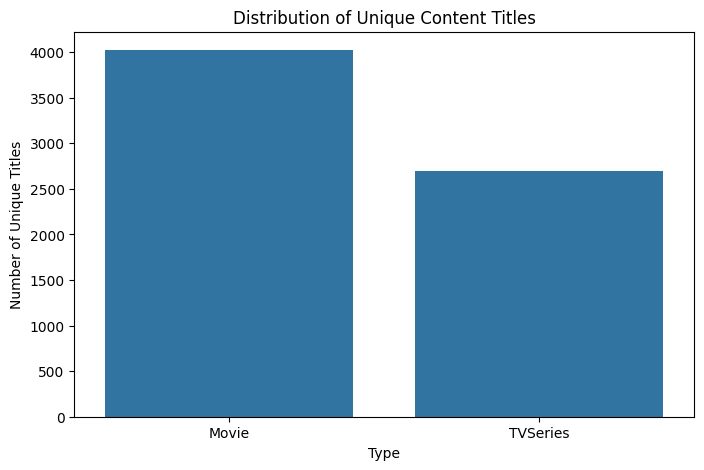

In [13]:
#to find how many unique titles of movies/tv shows are there use the name and
#type columns coz if you use content type, the graph shows more number of tv shows than movies
#because in combined dataframe the content column has combo of two datasets :tv shows and movies

# Calculate the count of unique titles for each content type
unique_titles = combined_df.groupby('type')['name'].nunique().reset_index()

# Rename the columns for clarity
unique_titles.columns = ['Type', 'Unique Title Count']

# Create a bar plot for the unique title counts
plt.figure(figsize=(8, 5))
sns.barplot(x='Type', y='Unique Title Count', data=unique_titles)
plt.title('Distribution of Unique Content Titles')
plt.xlabel('Type')
plt.ylabel('Number of Unique Titles')
plt.show()

*Output*: There are upto 4000 unique movie titles > 2500 tv show titles in the Netflix library
*Conclusion* : this data can be used to find more strategies for acquisitions, cross analyse revenue etc.



**plot for distribution of content ratings**

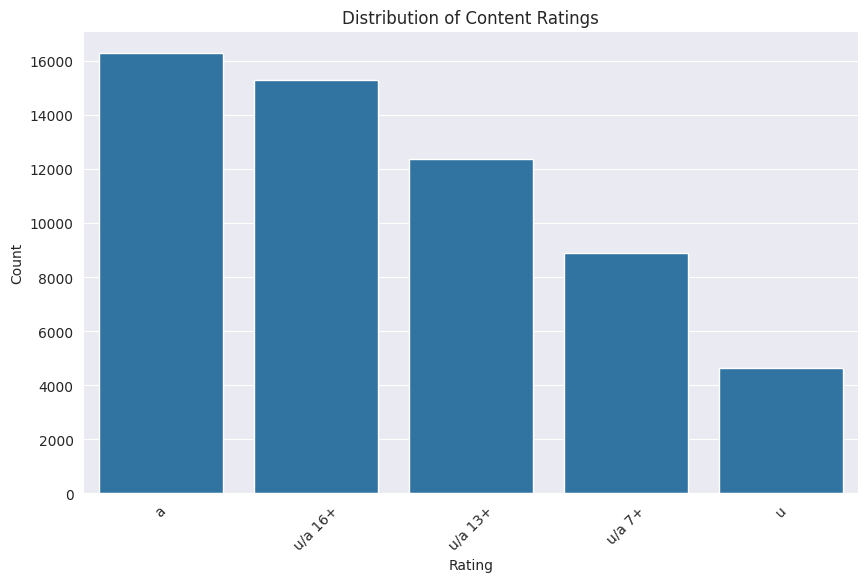

In [14]:
# Set the style for the plots
sns.set_style("darkgrid")

# Create a count plot for 'rating'
# countplot is basically bar graph and x=;rating',combined_df  means that sns.countplot
# function should take values from x=rating column from the combined_df for calculation and category
# of x axis
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=combined_df, order=combined_df['rating'].value_counts().index)
plt.title('Distribution of Content Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Find top genres for movies and TV shows**

/tmp/ipython-input-15-2178967126.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.index, y=top_genres.values, palette='muted')


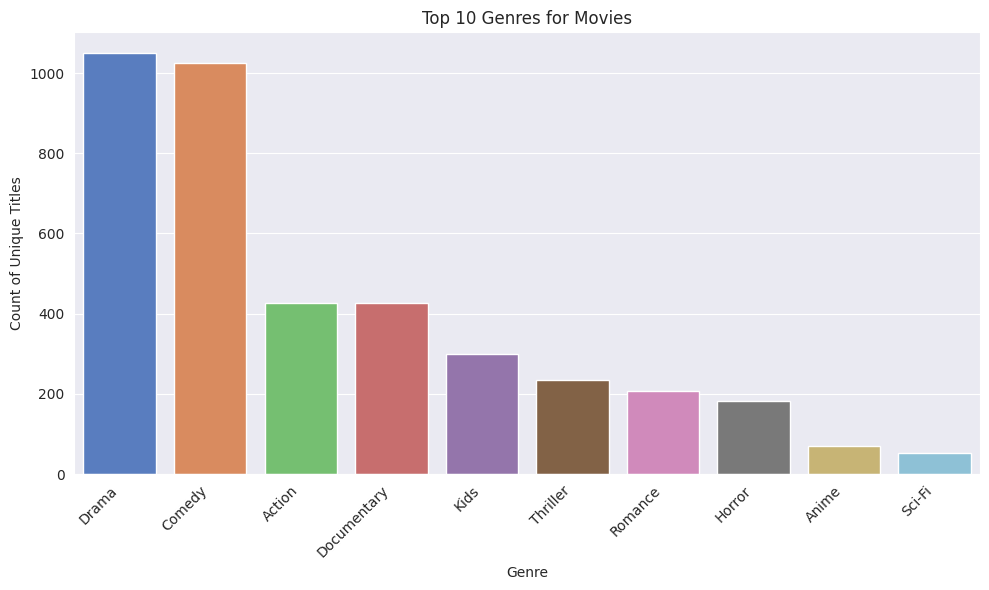

/tmp/ipython-input-15-2178967126.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.index, y=top_genres.values, palette='muted')


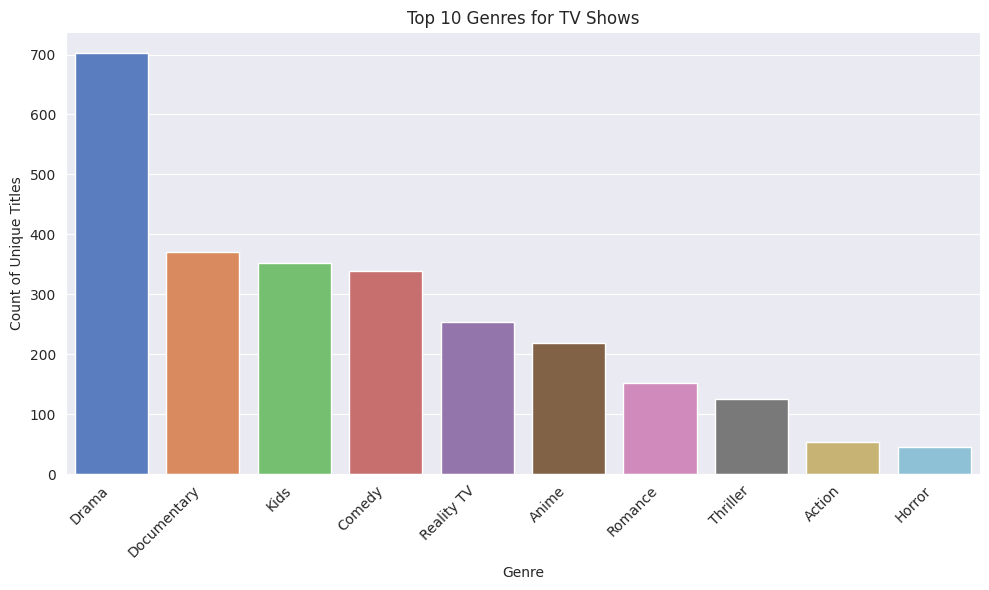

In [15]:
# Filter data for Movies from the original df_movies_shows
movies_df_original = df_movies_shows[df_movies_shows['type'] == 'Movie'].copy()

# Filter data for TV Shows from the original df_movies_shows
tvshows_df_original = df_movies_shows[df_movies_shows['type'] == 'TVSeries'].copy()

# Function to get top n=10 genres for a given DataFrame
def top_genres(df, title, n=10):    #this function goes through the datframe titles column top 10
    # Split genres string and create a list of all genres
    # Convert to string to handle potential NaN values before splitting
#split() function split string based on a seperator i.e ' ; '
#explode() function breaks a row which might have two genres into individual rows to create Series

    all_genres = df['genre'].astype(str).str.split(';').explode()
    # Remove 'nan' entries that resulted from splitting missing values
    all_genres = all_genres[all_genres != 'nan']
    # Get the top N most frequent genres of the dataframe and specific column mentioned in the top_genre func
    top_genres = all_genres.value_counts().nlargest(n)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_genres.index, y=top_genres.values, palette='muted')
    plt.title(f'Top {n} Genres for {title}')
    plt.xlabel('Genre')
    plt.ylabel('Count of Unique Titles')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Get and plot top genres for Movies using the original DataFrame
top_genres(movies_df_original, 'Movies')

# Get and plot top genres for TV Shows using the original DataFrame
top_genres(tvshows_df_original, 'TV Shows')

**top production countries**

/tmp/ipython-input-16-1841595111.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='rainbow')


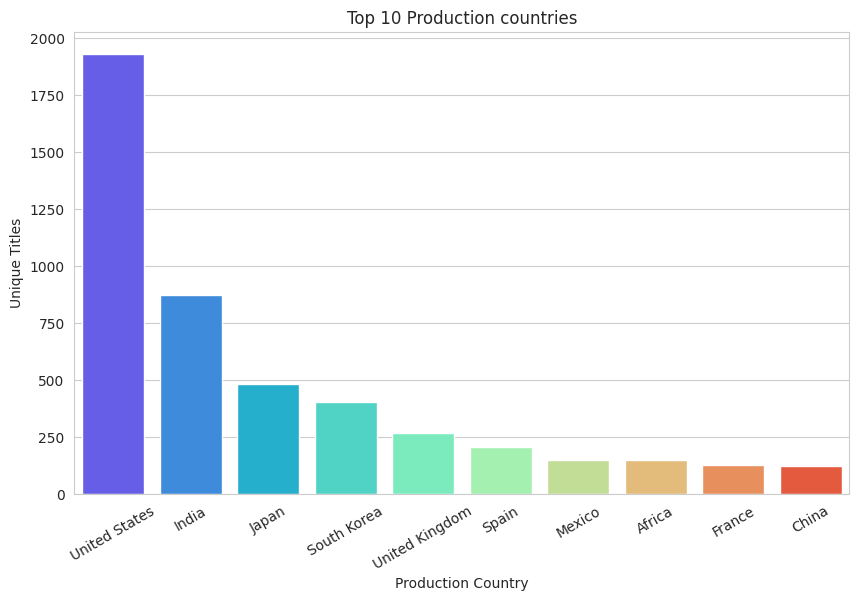

In [16]:
all_countries=df_movies_shows['production_country'].astype(str).str.split(';').explode()
all_countries=all_countries[all_countries!='nan']
top_countries= all_countries.value_counts().nlargest(10)
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='rainbow')
plt.title("Top 10 Production countries")
plt.xlabel("Production Country")
plt.ylabel("Unique Titles")
plt.xticks(rotation=30)

plt.show()

**Number of releases per year**

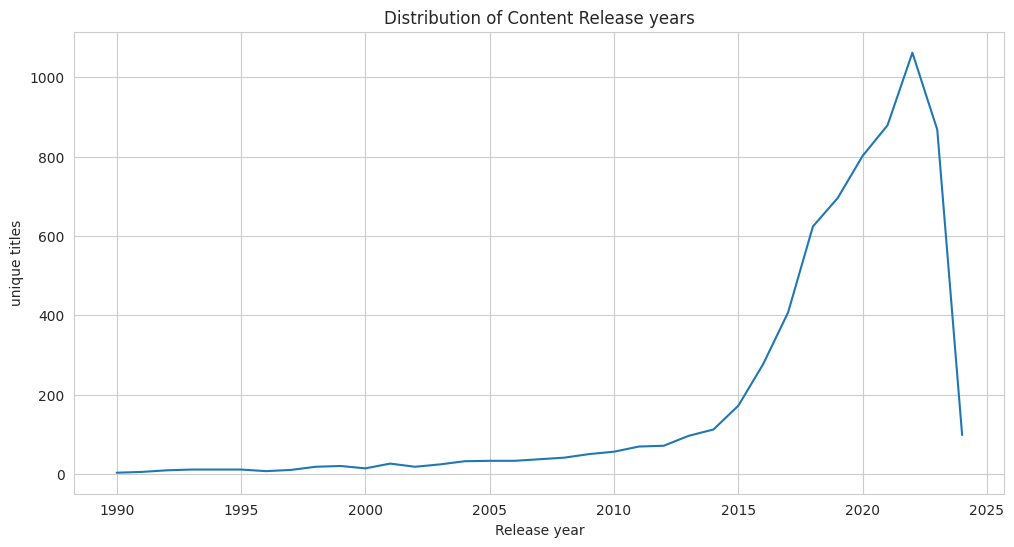

In [18]:
# count the number of releases of unique tites per year and rows with missing
# release year values are useless
release_years=df_movies_shows["release_year"].dropna().astype(int)
#dropna() is a func where new Series is returned with all  missing values removed, taken from old Series
release_counts=release_years.value_counts().sort_index()
filtered_release_counts = release_counts[release_counts.index>=1990]
plt.figure(figsize=(12,6))
plt.plot(filtered_release_counts.index, filtered_release_counts.values)
plt.title("Distribution of Content Release years")
plt.xlabel("Release year")
plt.ylabel("unique titles")
plt.grid(True)
plt.show()


**Bivariate Analysis**

**Content type vs Genre**

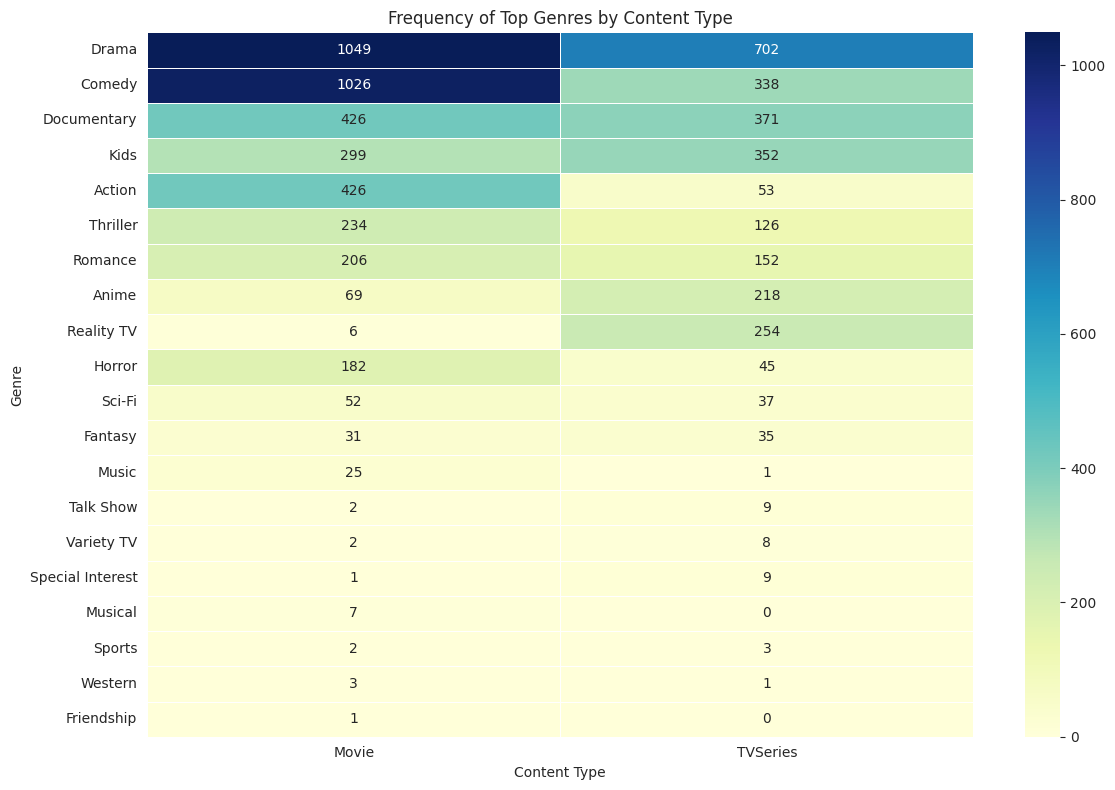

In [19]:
# Use the original df_movies_shows for accurate genre counts per type
# Drop rows with missing genre information
df_genres = df_movies_shows.dropna(subset=['genre']).copy()

# Split the genres and explode them into separate rows
df_genres['genre'] = df_genres['genre'].astype(str).str.split(';')
df_genres_exploded = df_genres.explode('genre')

# Count the occurrences of each genre for each content type
genre_type_counts = df_genres_exploded.groupby(['genre', 'type']).size().unstack(fill_value=0)

# Select the top N genres based on total count across both types for better visualization
top_n_genres = genre_type_counts.sum(axis=1).nlargest(20).index # Let's take top 20 for more detail

# Filter the counts to include only the top N genres
genre_type_counts_top = genre_type_counts.loc[top_n_genres]

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(genre_type_counts_top, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)
plt.title('Frequency of Top Genres by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Genre')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Rating vs Genre**

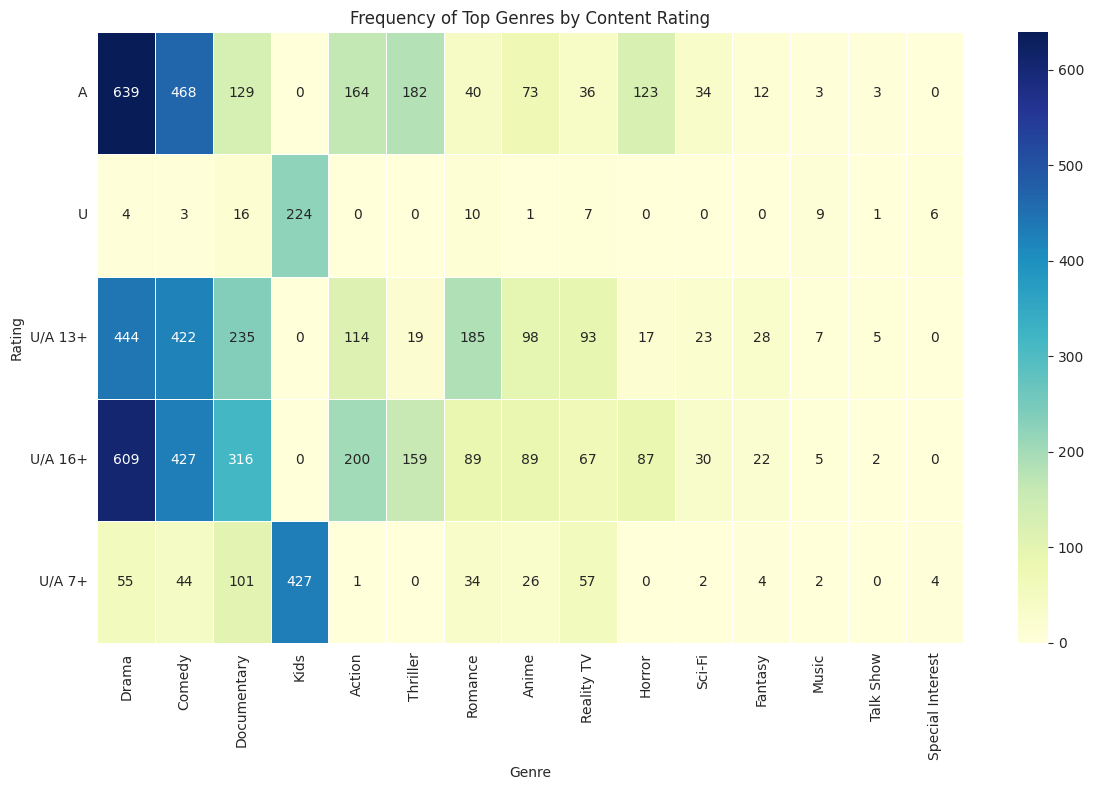

In [20]:
# Use the original df_movies_shows for accurate counts per rating and genre
# Drop rows with missing genre or rating information
df_rating_genre = df_movies_shows.dropna(subset=['rating', 'genre']).copy()

# Split the genres and explode them into separate rows
df_rating_genre['genre'] = df_rating_genre['genre'].astype(str).str.split(';')
df_rating_genre_exploded = df_rating_genre.explode('genre')

# Count the occurrences of each genre for each rating
rating_genre_counts = df_rating_genre_exploded.groupby(['rating', 'genre']).size().unstack(fill_value=0)

# Select the top N genres based on total count across all ratings for better visualization
# Let's take top 15 genres for this heatmap
top_n_genres_rating = rating_genre_counts.sum(axis=0).nlargest(15).index

# Filter the counts to include only the top N genres
rating_genre_counts_top = rating_genre_counts[top_n_genres_rating]

# Sort ratings for better visualization, if a logical order exists (e.g., by age)
# We can manually define an order if needed, but let's see the default first
# Example order: rating_order = ['u', 'u/a 7+', 'u/a 13+', 'u/a 16+', 'a']
# rating_genre_counts_top = rating_genre_counts_top.reindex(rating_order)


# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(rating_genre_counts_top, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)
plt.title('Frequency of Top Genres by Content Rating')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**production country vs content type**

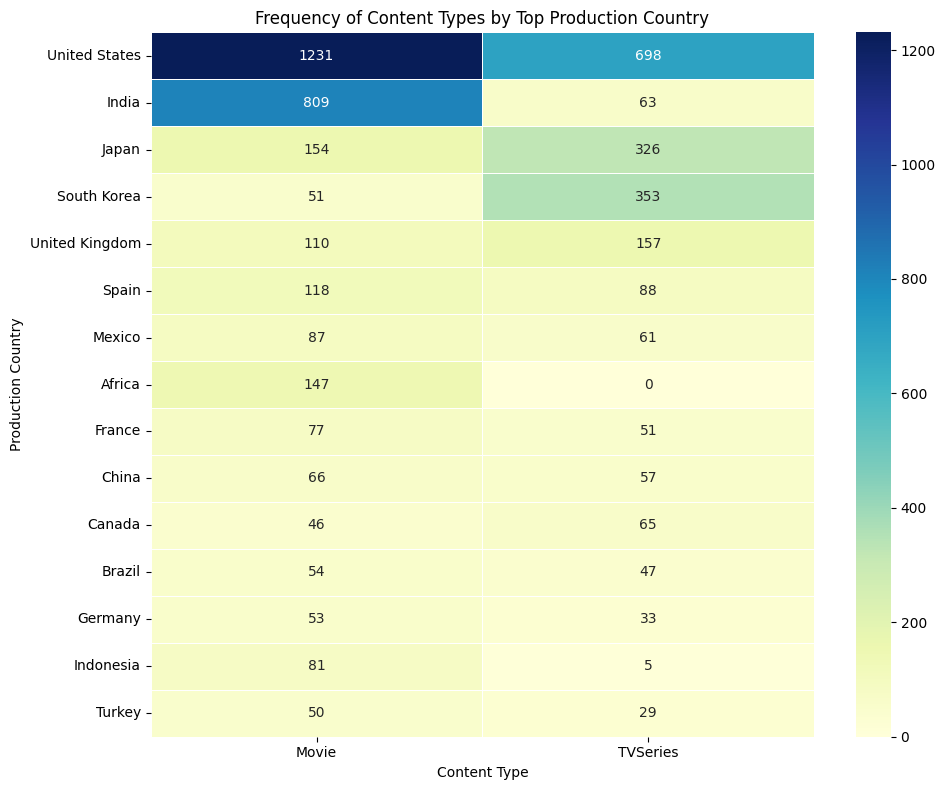

In [6]:
# Use the original df_movies_shows for accurate counts per country and type
# Drop rows with missing production_country or type information
df_country_type = df_movies_shows.dropna(subset=['production_country', 'type']).copy()

# Split the production_country column and explode it into separate rows
df_country_type['production_country'] = df_country_type['production_country'].astype(str).str.split(';')
df_country_type_exploded = df_country_type.explode('production_country')

# Count the occurrences of each production country for each content type
country_type_counts = df_country_type_exploded.groupby(['production_country', 'type']).size().unstack(fill_value=0)

# Select the top N countries based on total count across both types for better visualization
# Let's take the top 15 countries
top_n_countries_type = country_type_counts.sum(axis=1).nlargest(15).index

# Filter the counts to include only the top N countries
country_type_counts_top = country_type_counts.loc[top_n_countries_type]

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(country_type_counts_top, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)
plt.title('Frequency of Content Types by Top Production Country')
plt.xlabel('Content Type')
plt.ylabel('Production Country')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

/tmp/ipython-input-7-2320472666.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=df_genres_top, x='genre', col='type', kind='count', palette='viridis', height=6, aspect=1.5, col_wrap=2,


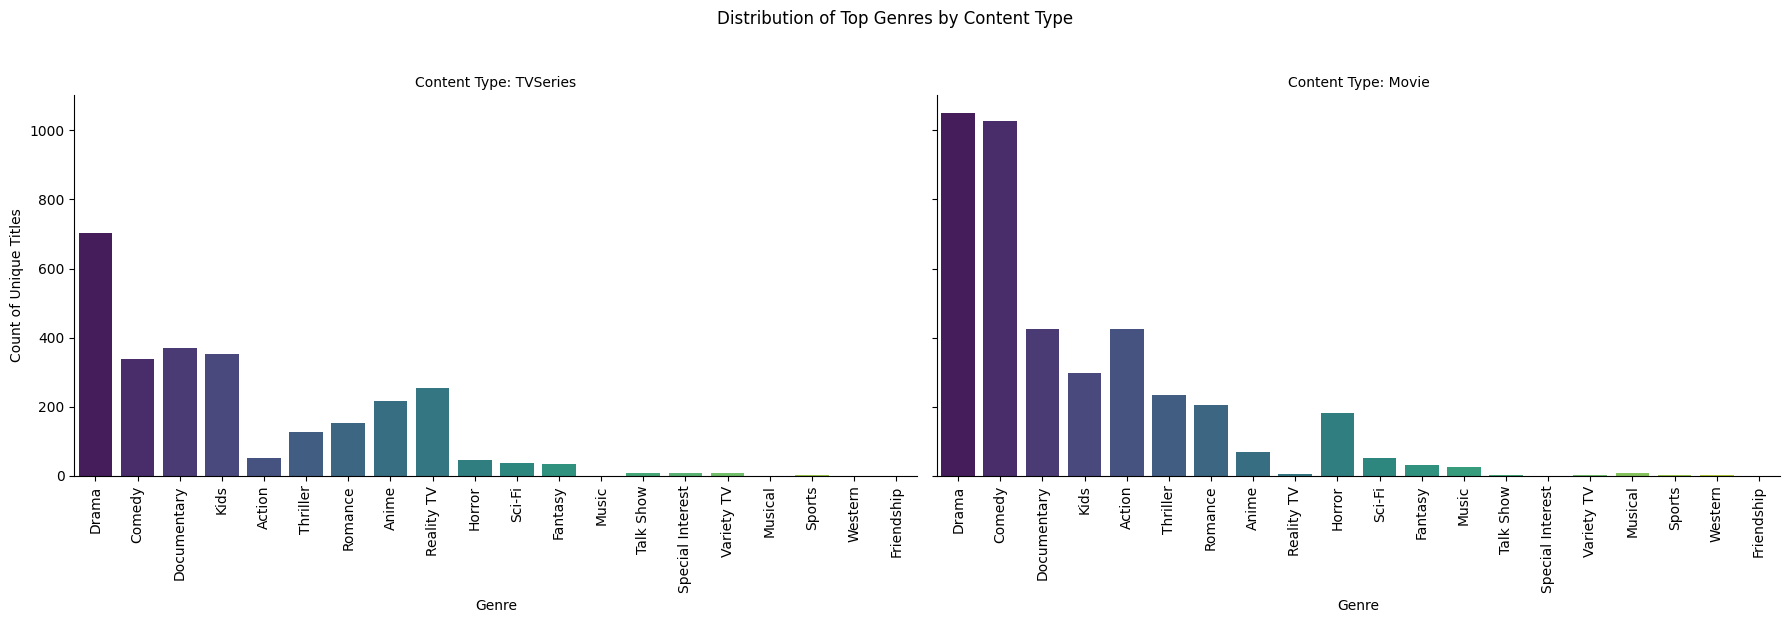

In [7]:
# Use the original df_movies_shows for genre analysis
df_genres = df_movies_shows.dropna(subset=['genre']).copy()

# Split the genres and explode them into separate rows
df_genres['genre'] = df_genres['genre'].astype(str).str.split(';')
df_genres_exploded = df_genres.explode('genre')

# Remove 'nan' entries that resulted from splitting missing values
df_genres_exploded = df_genres_exploded[df_genres_exploded['genre'] != 'nan']

# Get the top genres overall to ensure consistent categories across facets
top_overall_genres = df_genres_exploded['genre'].value_counts().nlargest(20).index

# Filter the exploded DataFrame to include only the top overall genres
df_genres_top = df_genres_exploded[df_genres_exploded['genre'].isin(top_overall_genres)].copy()


# Create a FacetGrid to plot count plots for each content type
g = sns.catplot(data=df_genres_top, x='genre', col='type', kind='count', palette='viridis', height=6, aspect=1.5, col_wrap=2,
                order=top_overall_genres) # Use the overall top genres order

# Rotate x-axis labels for better readability
g.set_xticklabels(rotation=90)

# Set titles and labels
g.fig.suptitle('Distribution of Top Genres by Content Type', y=1.03) # Adjust title position
g.set_axis_labels("Genre", "Count of Unique Titles")
g.set_titles("Content Type: {col_name}")

plt.tight_layout()
plt.show()